<a href="https://colab.research.google.com/github/jpsiegel/Projects/blob/master/GoL_JanS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
from pylab import *
from IPython import display
import time

In [0]:
n = 50 # size of space: n x n
p = 3/8 # probability of initially cells

# Make an initial pattern 10x10 (here is a glider):
initconfig = \
array([\
[0,0,0,0,0,0,0,0,0,0], \
[0,0,0,0,0,0,0,0,0,0], \
[0,0,0,0,0,0,0,0,0,0], \
[0,0,0,0,1,0,0,0,0,0], \
[0,0,0,0,0,1,0,0,0,0], \
[0,0,0,1,1,1,0,0,0,0], \
[0,0,0,0,0,0,0,0,0,0], \
[0,0,0,0,0,0,0,0,0,0], \
[0,0,0,0,0,0,0,0,0,0], \
[0,0,0,0,0,0,0,0,0,0] \
])

def initialize():
    global config, nextconfig
    config = zeros([n, n])
    # r = np.random.uniform(size=config.shape)
    # config = 1 * (r<p)
    config[25:35,25:35] = initconfig
    nextconfig = zeros([n, n])
    
def observe():
    global config, nextconfig
    cla()
    imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)

def update():
    global config, nextconfig
    for x in range(n):
        for y in range(n):
            count = 0
            central_value = config[x % n, y % n]
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    if dx == 0 and dy == 0: #dont count central cell (outer totalistic)
                      continue
                    count += config[(x + dx) % n, (y + dy) % n]
            if count == 3 and central_value == 0: #birth (lives)
              nextconfig[x, y] = 1
            elif count > 3 and central_value == 1: #overpopulation (dies)
              nextconfig[x, y] = 0
            elif count < 2 and central_value == 1: #underpopulation (dies)
              nextconfig[x, y] = 0
            else: #stasis (stays the same)
              nextconfig[x, y] = central_value
    config, nextconfig = nextconfig, config


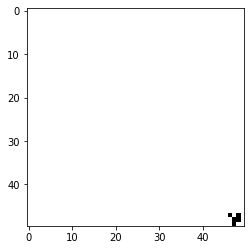

KeyboardInterrupt: ignored

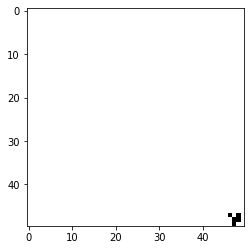

In [10]:
# Simulate and plot results
initialize()
for t in range(100):
    update()
    observe()
    display.clear_output(wait=True)
    display.display(gcf())
    time.sleep(0.1)
    plt.close()
plt.show()